# Восстановление золота из руды

Подготовка прототипа модели машинного обучения. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используются данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Технологический процесс**


- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant 
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота


**Параметры этапов**


- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:
`[этап].[тип_параметра].[название_параметра]`


Пример: `rougher.input.feed_ag`


Возможные значения для блока `[этап]`:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики


Возможные значения для блока `[тип_параметра]`:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Подготовка данных

### Открываем файлы и изучаем.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


### Проверим, что эффективность обогащения рассчитана правильно

Рассчитаем эффективность обогащения для чернового концентрата Recovery по формуле

![Формула:](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [9]:
train_data['calculated_recovery'] = \
(train_data['rougher.output.concentrate_au'] * 
(train_data['rougher.input.feed_au'] - train_data['rougher.output.tail_au']) / 
(train_data['rougher.input.feed_au'] * 
(train_data['rougher.output.concentrate_au'] - train_data['rougher.output.tail_au']))) * 100

In [10]:
# Вычисление MAE

MAE = mean_absolute_error(train_data['rougher.output.recovery'], train_data['calculated_recovery'])
print(f'MAE = {MAE}')

MAE = 9.73512347450521e-15


Полученное значение MAE принимает крайне низкое значение и близко к нулю, что говорит о малой средней ошибке, что означает что формула хорошо подходит для расчёта `rougher.output.recovery` и эффективность обогащения рассчитана правильно в обучающей выборке.

Так же предлагаю посчитать метрику MAPE для подтверждения точности

In [11]:
MAPE = mean_absolute_percentage_error(train_data['rougher.output.recovery'], train_data['calculated_recovery'])
print(f'MAPE = {MAPE:.2%}')

MAPE = 0.00%


MAPE в 0.00% подтверждает, что процентная ошибка между фактическими значениями и рассчитанными значениями настолько мала, что её можно считать несущественной

### Проанализируем признаки, недоступные в тестовой выборке.

In [12]:
# Определим признаки, которые отсуствуют в тестовой выборке, но есть в обучающей

miss_features = set(train_data.columns) - set(test_data.columns)

In [13]:
# Выведем типы столбцов отстутствующих в тестовой выборке

miss_features_info = train_data[miss_features].dtypes
miss_features_info

secondary_cleaner.output.tail_au                      float64
final.output.concentrate_sol                          float64
rougher.output.tail_pb                                float64
calculated_recovery                                   float64
secondary_cleaner.output.tail_pb                      float64
primary_cleaner.output.tail_au                        float64
final.output.concentrate_pb                           float64
primary_cleaner.output.tail_pb                        float64
final.output.tail_pb                                  float64
secondary_cleaner.output.tail_sol                     float64
final.output.tail_sol                                 float64
rougher.output.tail_sol                               float64
rougher.output.tail_ag                                float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
secondary_cleaner.output.tail_ag                      float64
primary_cleaner.output.concentrate_au                 float64
primary_

Основные присутсвующие типы параметров это: `output` и `calculation`. 

`output` как целевой параметр должен отсуствовать в тестовой выборке, так же как и `calculation`, который является расчётной характеристикой.

### Проведём предобработку данных.

In [14]:
# Подсчёт пустых значений gold_recovery_train_new.csv

train_data.isnull().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.tail_au                         0
rougher.state.floatbank10_d_air                0
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_e_level              0
calculated_recovery                            0
Length: 88, dtype: int64

In [15]:
# Подсчёт пустых значений gold_recovery_test_new.csv

test_data.isnull().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.st

In [16]:
# Заполним пропуски методом интерполяции, так как данные индексируются по времени

train_data = train_data.interpolate(method='linear')
test_data = test_data.interpolate(method='linear')
full_data = full_data.interpolate(method='linear')

In [17]:
# Считаем количество пустых значений

print(train_data.isnull().sum().sum())
print(test_data.isnull().sum().sum())
print(full_data.isnull().sum().sum())

0
0
0


In [18]:
# Вывод количества строк-дубликатов в данных

print('Количество строк-дубликатов train_data:', train_data.duplicated().sum())
print('Количество строк-дубликатов test_data:', test_data.duplicated().sum())
print('Количество строк-дубликатов full_data:', full_data.duplicated().sum())

Количество строк-дубликатов train_data: 0
Количество строк-дубликатов test_data: 0
Количество строк-дубликатов full_data: 0


In [19]:
# Преобразуем столбец date в в формат datetime

train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
full_data['date'] = pd.to_datetime(full_data['date'])

- Были загружены и изучены три набора данных: обучающий, тестовый и исходный.
- Эффективность обогащения рассчитана правильно, что подтвердилось минимальной ошибкой (MAE ≈ 0 и MAPE ≈ 0%), что означает высокую точность расчетов.
- Выявлены признаки, которые присутствуют только в обучающей выборке (output и calculation).
- Для устранения пропусков применена линейная интерполяция. Были проверены и исключены строки-дубликаты, а также произведено преобразование столбца date.


## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Для того чтобы оценить концентрацию металов на различных этапах очистки необходимо определить средние значения для этапов:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Для параметра флотации взять сырьё на входе и выходе. На входе считать как начальную концентрацию.

Используем следующие параметры:
- `rougher.input.feed_au`, `rougher.input.feed_ag`, `rougher.input.feed_pb` - начальное сырье
- `rougher.output.concentrate_au`, `rougher.output.concentrate_ag`, `rougher.output.concentrate_pb` - после флотации
- `primary_cleaner.output.concentrate_au`, `primary_cleaner.output.concentrate_ag`, `primary_cleaner.output.concentrate_pb` - после первичной очистки
- `final.output.concentrate_au`, `final.output.concentrate_ag`, `final.output.concentrate_pb` - после вторичной очистки

In [20]:
# Определим концетрацию золота Au

au_concentrate = {
    'Начальное сырьё': train_data['rougher.input.feed_au'].mean(),
    'После флотации': train_data['rougher.output.concentrate_au'].mean(),
    'После первичной очистки': train_data['primary_cleaner.output.concentrate_au'].mean(),
    'После вторичной очистки': train_data['final.output.concentrate_au'].mean()
}

In [21]:
# Определим концетрацию серебра Ag

ag_concentrate = {
    'Начальное сырьё': train_data['rougher.input.feed_ag'].mean(),
    'После флотации': train_data['rougher.output.concentrate_ag'].mean(),
    'После первичной очистки': train_data['primary_cleaner.output.concentrate_ag'].mean(),
    'После вторичной очистки': train_data['final.output.concentrate_ag'].mean()
}

In [22]:
# Определим концетрацию свинца Pb

pb_concentrate = {
    'Начальное сырьё': train_data['rougher.input.feed_pb'].mean(),
    'После флотации': train_data['rougher.output.concentrate_pb'].mean(),
    'После первичной очистки': train_data['primary_cleaner.output.concentrate_pb'].mean(),
    'После вторичной очистки': train_data['final.output.concentrate_pb'].mean()
}

In [23]:
concentration_data = pd.DataFrame({
    'Золото': au_concentrate,
    'Серебро': ag_concentrate,
    'Свинец': pb_concentrate
})
concentration_data

,Золото,Серебро,Свинец
Начальное сырьё,7.866577,8.579195,3.505983
После флотации,19.439958,11.775812,7.664555
После первичной очистки,32.386836,8.200916,9.568501
После вторичной очистки,44.003792,5.141918,10.132845


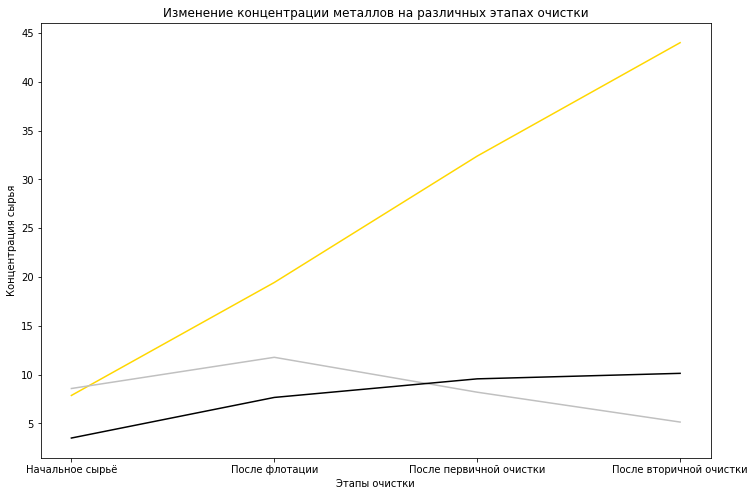

In [24]:
plt.figure(figsize=(12,8))
plt.plot(concentration_data.index, concentration_data['Золото'], label='Золото', color='gold')
plt.plot(concentration_data.index, concentration_data['Серебро'], label='Серебро', color='silver')
plt.plot(concentration_data.index, concentration_data['Свинец'], label='Свинец', color='black')

plt.title('Изменение концентрации металлов на различных этапах очистки')
plt.xlabel('Этапы очистки')
plt.ylabel('Концентрация сырья')
plt.show()

Данный график показывает равномерное повышение концентрации золота и свинца на всех этапах очистки, тогда как у серебра наблюдается пониженная тенденция. Это говорит о эффективности этапах очистки для золота и чуть в меньшей степени для свинца.

Концентрация **Золота** значительно повышается от начального сырья к финальному продукту, что показывает эффективность этапов очистки для извлечения золота.

Концентрация **Cвинца** также постепенно увеличивается, что может свидетельствовать о способности процессов флотации и очистки выделять свинец вместе с золотом, особенно в финальной стадии.


Концентрация **Cеребра**, наоборот, снижается, особенно после этапа флотации. Это может говорить о том, что часть серебра либо уходит в отходы, либо его извлечение приоритетно не предусматривается на всех этапах. Либо в данных есть ошибка.

Проверим изменение концетрации серебра на разных этапах очистки.

Используем следующие параметры:

- `rougher.output.tail_ag` - концетрация серебра в отходах после флотации
- `primary_cleaner.output.tail_ag` - концетрация серебра в отходах после первичной очистки
- `secondary_cleaner.output.tail_ag` - концетрация серебра в отходах после вторичной очистки

In [25]:
# Определим концетрацию серебра Ag в отходах

ag_tail_concentrate = {
    'После флотации': train_data['rougher.output.tail_ag'].mean(),
    'После первичной очистки': train_data['primary_cleaner.output.tail_ag'].mean(),
    'После вторичной очистки': train_data['secondary_cleaner.output.tail_ag'].mean()
}
ag_tail_concentrate

{'После флотации': 5.567241682743779,
 'После первичной очистки': 16.30374243863253,
 'После вторичной очистки': 14.281317871617125}

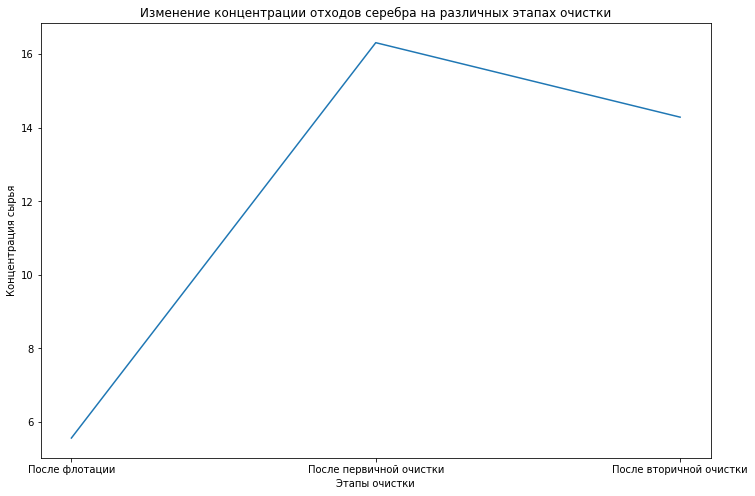

In [26]:
plt.figure(figsize=(12,8))
plt.plot(list(ag_tail_concentrate.keys()), list(ag_tail_concentrate.values()))

plt.title('Изменение концентрации отходов серебра на различных этапах очистки')
plt.xlabel('Этапы очистки')
plt.ylabel('Концентрация сырья')
plt.show()

Результат показывает, что концентрация серебра в отходах значительно увеличивается на этапе первичной очистки и затем немного снижается на этапе вторичной очистки.

Мы наблюдаем неравномерность извлечения серебра. Резкий рост серебра в отходах на этапе первичной очистки может говорить о неэффективности процесса на данном этапе, либо фокус в добыче направлен на другие металлы.

Для улучшения показателей можно было бы рассмотреть возможность оптимизации процесса очистки именно для серебра.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

*feed size* — размер гранул сырья

Размеры гранул сырья указаны в `rougher.input.feed_size` и `primary_cleaner.input.feed_size`

Построим графики распределения

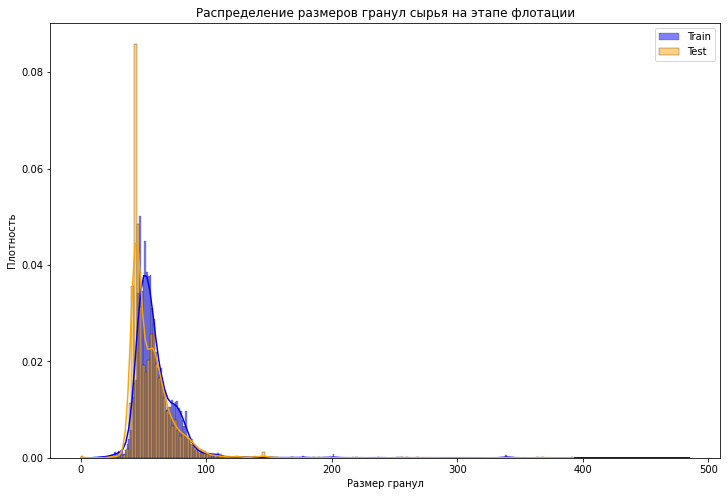

In [55]:
# График для этапа флотации

plt.figure(figsize=(12,8))
sns.histplot(train_data['rougher.input.feed_size'], kde=True, stat='density', common_norm=False, label='Train', color='blue')
sns.histplot(test_data['rougher.input.feed_size'], kde=True, stat='density', common_norm=False, label='Test', color='orange')
plt.xlabel('Размер гранул')
plt.ylabel('Плотность')
plt.title('Распределение размеров гранул сырья на этапе флотации')
plt.legend()
plt.show()

На данном графике наблюдаем, что значения для двух выборок примерно совпадают, особенно в диапазоне от 0 до 100. Распределения значения в двух выборках схожи. Есть некоторые выбросы в обоих выборках, но не в больших количествах.

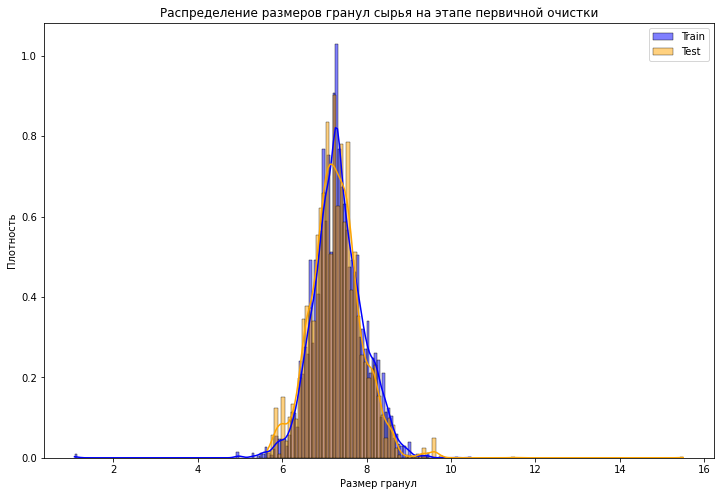

In [56]:
# График для этапа первичной очистки

plt.figure(figsize=(12,8))
sns.histplot(train_data['primary_cleaner.input.feed_size'], kde=True, stat='density', common_norm=False, label='Train', color='blue')
sns.histplot(test_data['primary_cleaner.input.feed_size'], kde=True, stat='density', common_norm=False, label='Test', color='orange')
plt.xlabel('Размер гранул')
plt.ylabel('Плотность')
plt.title('Распределение размеров гранул сырья на этапе первичной очистки')
plt.legend()
plt.show()

На графике распределения размеров гранул сырья на этапе первичной очистки наблюдается нормальное распределение у двух выборок. У обучающей выборки более высокий пик распределения и острее чем у тестовой. Оба распределения имеют длинные хвосты, но они также схожи.

Можем сделать вывод, что размеры гранул двух выборок на разных этапах во многом схожи. Распределения обоих выборок имеют небольшие различия друг от друга, которые не должны повлият на обучение модели.

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

Определим признаки:
    
- `input` — сырьё
- `rougher` - черновой концентрат
- `final` - финальный концентрат


Столбцы для анализа. На флотацию поступает сырьё, после выходит черновой концентрат, а после двух двух этапов очистки получается финальный концентрат.

- Стадия сырья: `rougher.input.feed_au`, `rougher.input.feed_ag`, `rougher.input.feed_pb`, `rougher.input.feed_sol`
- Стадия чернового концентрата: `rougher.output.concentrate_au`, `rougher.output.concentrate_ag`, `rougher.output.concentrate_pb`, `rougher.output.concentrate_sol`
- Стадия финального концентрата: `final.output.concentrate_au`, `final.output.concentrate_ag`, `final.output.concentrate_pb`, `final.output.concentrate_sol`

In [29]:
# Создадим столбец с сумарной концетрацей на стадии сырья

train_data['input_total_concentration'] = (
train_data['rougher.input.feed_au'] +
train_data['rougher.input.feed_ag'] +
train_data['rougher.input.feed_pb'] +
train_data['rougher.input.feed_sol'])

In [30]:
# Создадим столбец с сумарной концетрацей на стадии чернового концентрата

train_data['rougher_total_concentration'] = (
train_data['rougher.output.concentrate_au'] +
train_data['rougher.output.concentrate_ag'] +
train_data['rougher.output.concentrate_pb'] +
train_data['rougher.output.concentrate_sol'])

In [31]:
# Создадим столбец с сумарной концетрацей на стадии финального концентрата

train_data['final_total_concentration'] = (
train_data['final.output.concentrate_au'] +
train_data['final.output.concentrate_ag'] +
train_data['final.output.concentrate_pb'] +
train_data['final.output.concentrate_sol'])

In [32]:
train_data[['input_total_concentration', 'rougher_total_concentration', 'final_total_concentration']].describe()

,input_total_concentration,rougher_total_concentration,final_total_concentration
count,14149.000000,14149.000000,14149.000000
mean,56.238667,67.178166,68.395671
std,7.028115,12.703461,7.016871
min,0.040000,0.000000,0.000000
25%,52.573579,64.925021,67.562287
50%,56.617697,69.175663,69.142447
75%,60.762971,73.429929,70.974661
max,74.458253,88.140119,80.210644


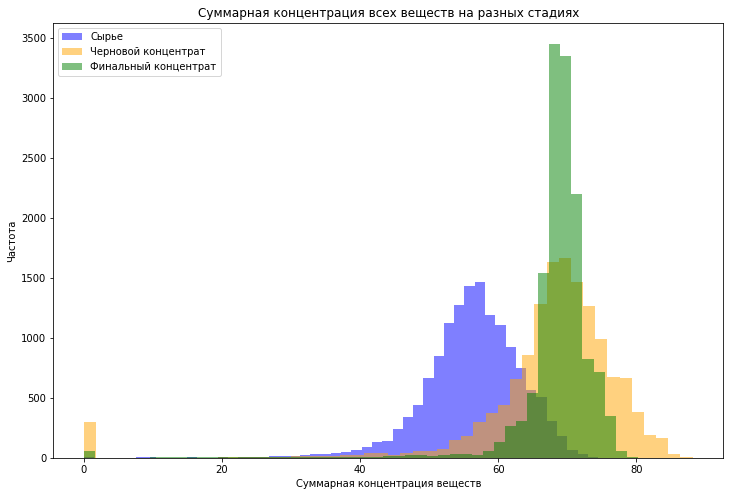

In [33]:
plt.figure(figsize=(12, 8))


plt.hist(train_data['input_total_concentration'], bins=50, alpha=0.5, label='Сырье', color='blue')
plt.hist(train_data['rougher_total_concentration'], bins=50, alpha=0.5, label='Черновой концентрат', color='orange')
plt.hist(train_data['final_total_concentration'], bins=50, alpha=0.5, label='Финальный концентрат', color='green')

plt.xlabel('Суммарная концентрация веществ')
plt.ylabel('Частота')
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.legend()
plt.show()

На этапе сырья концентрация веществ равномерно и широко распределена, что говорит о высоком и различном наличии веществ в сырье.

После флотации сумарная концентрация остаётся примерно на том же уровне, но суммарно концентрация веществ увеличивается.

После двух этапов очистки в финальной концетрате наблюдается увеличения нужных элементов в конечном итоге, что показывает высокий пик расспределения. Это говорит о том, что процесс очистки увеличивает концентрацию нужных элементов на финальном этапе.


Так же мы наблюдаем нулевые и околонулевые значения, что говорит об ошибке. Для точности обучения модели удалим такие наблюдения.

In [34]:
# Отфильтруем знаения с концентрацией ниже 1

train_data = train_data[
    (train_data['rougher.input.feed_au'] > 1) &
    (train_data['rougher.input.feed_ag'] > 1) &
    (train_data['rougher.input.feed_pb'] > 1) &
    (train_data['rougher.input.feed_sol'] > 1) &
    (train_data['rougher.output.concentrate_au'] > 1) &
    (train_data['rougher.output.concentrate_ag'] > 1) &
    (train_data['rougher.output.concentrate_pb'] > 1) &
    (train_data['rougher.output.concentrate_sol'] > 1) &
    (train_data['final.output.concentrate_au'] > 1) &
    (train_data['final.output.concentrate_ag'] > 1) &
    (train_data['final.output.concentrate_pb'] > 1) &
    (train_data['final.output.concentrate_sol'] > 1)
]

На данном этапе выполненны следующие шаги по анализу данных:

1. Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки:
- Концентрация золота (Au) последовательно возрастает от начального сырья к финальному продукту, что свидетельствует о высокой эффективности процессов флотации и очистки для извлечения золота.
- Концентрация свинца (Pb) также постепенно увеличивается на всех этапах, что может указывать на совместное извлечение свинца вместе с золотом.
- Концентрация серебра (Ag), напротив, снижается на этапах очистки. Дополнительный анализ показал, что концентрация серебра в отходах увеличивается на этапе первичной очистки, что может свидетельствовать о его значительных потерях на этом этапе.

2. Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Распределения размеров гранул на этапах флотации и первичной очистки схожи между обучающей и тестовой выборками. Обнаружены небольшие различия в плотности распределений, но они не должны существенно повлиять на обучение модели.

3. Анализ суммарной концентрации всех веществ на различных стадиях (сырье, черновой и финальный концентраты):

- На этапе сырья наблюдается равномерное и широкое распределение концентраций веществ, что указывает на исходно высокое разнообразие их содержания.
- На стадии чернового концентрата после флотации суммарная концентрация веществ в основном сохраняется, но наблюдается обогащение целевых элементов, особенно золота и свинца.
- На этапе финального концентрата после двух стадий очистки, наблюдается существенное повышение концентрации целевых элементов, что подтверждает эффективность процессов очистки.

## Модель

### Функция для вычисления итоговой sMAPE.

Формула для расчёта sMape

![Формула:](https://pictures.s3.yandex.net/resources/smape_1576239058.jpg)

Где:

- 𝑦𝑖 — значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
- 𝑦^ — значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
- 𝑁  — количество наблюдений

In [35]:
# Функция для расчёта sMape

def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2))

![Формула:](https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg)

In [36]:
# Функция для расчёта итогового sMape

def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    rougher_smape = smape(rougher_true, rougher_pred)
    final_smape = smape(final_true, final_pred)
    return 0.25 * rougher_smape + 0.75 * final_smape

### Обучим разные модели и оцените их качество.

In [37]:
# Получение списка признаков, которые есть в обеих выборках

common_features = list(set(train_data.columns) & set(test_data.columns))
common_features.remove('date')

In [38]:
# Создадим переменные с признаками и целевым признаком

x_train = train_data[common_features]
y_train_rougher = train_data['rougher.output.recovery']
y_train_final = train_data['final.output.recovery']

In [39]:
# Разделим выборку на валидационную и тестовую

x_train, x_val, y_train_rougher, y_val_rougher, y_train_final, y_val_final = train_test_split(
    x_train, y_train_rougher, y_train_final,
    test_size=0.25, random_state=12345)

Обучим модели и оценим их по sMAPE

In [40]:
# Обучим модель DecisionTreeRegressor для rougher.output.recovery

best_result_dt_rougher = float('inf') 
best_depth_dt_rougher = 0

for max_depth in range(1, 21):
    dt_model_rougher = DecisionTreeRegressor(max_depth=max_depth, random_state=12345)
    dt_model_rougher.fit(x_train, y_train_rougher)
    y_pred = dt_model_rougher.predict(x_val)
    score = smape(y_val_rougher, y_pred)

    if score < best_result_dt_rougher:
        best_result_dt_rougher = score
        best_depth_dt_rougher = max_depth

print("Лучший результат для rougher.output.recovery (DecisionTree):", best_result_dt_rougher)
print("Лучшая глубина для rougher.output.recovery (DecisionTree):", best_depth_dt_rougher)

Лучший результат для rougher.output.recovery (DecisionTree): 3.2837843134626863
Лучшая глубина для rougher.output.recovery (DecisionTree): 10


In [41]:
# Обучим модель DecisionTreeRegressor для final.output.recovery

best_result_dt_final = float('inf') 
best_depth_dt_final = 0

for max_depth in range(1, 21):
    dt_model_final = DecisionTreeRegressor(max_depth=max_depth, random_state=12345)
    dt_model_final.fit(x_train, y_train_final)
    y_pred = dt_model_final.predict(x_val)
    score = smape(y_val_final, y_pred)

    if score < best_result_dt_final:
        best_result_dt_final = score
        best_depth_dt_final = max_depth

print("Лучший результат для final.output.recovery (DecisionTree):", best_result_dt_final)
print("Лучшая глубина для final.output.recovery (DecisionTree):", best_depth_dt_final)

Лучший результат для final.output.recovery (DecisionTree): 7.103610900350521
Лучшая глубина для final.output.recovery (DecisionTree): 10


In [42]:
# Обучим модель RandomForestRegressor для rougher.output.recovery

best_result_rf_rougher = float('inf') 
best_depth_rf_rougher = 0
best_estimators_rougher = 0

for n_estimators in [5, 10, 20, 50]:
    for max_depth in range(1, 21):
        rf_model_rougher = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
        rf_model_rougher.fit(x_train, y_train_rougher)
        y_pred = rf_model_rougher.predict(x_val)
        score = smape(y_val_rougher, y_pred)
        
        if score < best_result_rf_rougher:
            best_result_rf_rougher = score
            best_depth_rf_rougher = max_depth
            best_estimators_rougher = n_estimators

print("Лучший результат для rougher.output.recovery (RandomForest):", best_result_rf_rougher)
print("Лучшая глубина для rougher.output.recovery (RandomForest):", best_depth_rf_rougher)
print("Лучшая количество деревьев для rougher.output.recovery (RandomForest):", best_estimators_rougher)

Лучший результат для rougher.output.recovery (RandomForest): 2.345103914507287
Лучшая глубина для rougher.output.recovery (RandomForest): 20
Лучшая количество деревьев для rougher.output.recovery (RandomForest): 50


In [43]:
# Обучим модель RandomForestRegressor для final.output.recovery

best_result_rf_final = float('inf') 
best_depth_rf_final = 0
best_estimators_final = 0

for n_estimators in [5, 10, 20, 50]:
    for max_depth in range(1, 21):
        rf_model_final = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
        rf_model_final.fit(x_train, y_train_final)
        y_pred = rf_model_final.predict(x_val)
        score = smape(y_val_final, y_pred)
        
        if score < best_result_rf_final:
            best_result_rf_final = score
            best_depth_rf_final = max_depth
            best_estimators_final = n_estimators

print("Лучший результат для final.output.recovery (RandomForest):", best_result_rf_final)
print("Лучшая глубина для final.output.recovery (RandomForest):", best_depth_rf_final)
print("Лучшая количество деревьев для final.output.recovery (RandomForest):", best_estimators_final)

Лучший результат для final.output.recovery (RandomForest): 5.671715890835924
Лучшая глубина для final.output.recovery (RandomForest): 20
Лучшая количество деревьев для final.output.recovery (RandomForest): 50


In [44]:
# Обучим модель LinearRegression для rougher.output.recovery

lr_model_rougher = LinearRegression()
lr_model_rougher.fit(x_train, y_train_rougher)
y_pred_rougher = lr_model_rougher.predict(x_val)
score = smape(y_val_rougher, y_pred_rougher)

print("Лучший результат для rougher.output.recovery (LinearRegression):", score)

Лучший результат для rougher.output.recovery (LinearRegression): 4.397835213593441


In [45]:
# Обучим модель LinearRegression для final.output.recovery

lr_model_final = LinearRegression()
lr_model_final.fit(x_train, y_train_final)
y_pred_final = lr_model_final.predict(x_val)
score = smape(y_val_final, y_pred_final)

print("Лучший результат для final.output.recovery (LinearRegression):", score)

Лучший результат для final.output.recovery (LinearRegression): 7.813619591411333


Для `rougher.output.recovery` лучше всего подходит RandomForestRegressor с 50 деревьями и глубиной 20, поскольку она даёт наименьшую ошибку sMAPE (**2.345**).


Для `final.output.recovery` лучшим была RandomForestRegressor с 50 деревьями и глубиной 20, так как у него наименьшая sMAPE (**5.6717**)

In [46]:
# Мёрджим признаки к тестовым данных по столбцу 'date'

test_data_merged = pd.merge(test_data, full_data[['rougher.output.recovery', 'final.output.recovery', 'date']], on='date', how='left')

In [47]:
# Выбираем данные из тестовой выборки и исходной для теста

x_test = test_data_merged[common_features]
y_test_rougher = test_data_merged['rougher.output.recovery']
y_test_final = test_data_merged['final.output.recovery']

In [60]:
# Тестируем лучшую модель для rougher.output.recovery (RandomForestRegressor)

best_dt_model_rougher_test = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=12345)
best_dt_model_rougher_test.fit(x_train, y_train_rougher)
rougher_pred_test = best_dt_model_rougher_test.predict(x_test)
score = smape(y_test_rougher, rougher_pred_test)

print('sMAPE для rougher.output.recovery на тестовой выборке:', score)

sMAPE для rougher.output.recovery на тестовой выборке: 8.086343807157425


In [61]:
# Тестируем лучшую модель для final.output.recovery (RandomForestRegressor)

best_rf_model_final_test = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=12345)
best_rf_model_final_test.fit(x_train, y_train_final)
final_pred_test = best_rf_model_final_test.predict(x_test)
score = smape(y_test_final, final_pred_test)

print('sMAPE для final.output.recovery на тестовой выборке:', score)

sMAPE для final.output.recovery на тестовой выборке: 9.900687149407887


In [50]:
# Выбираем данные для предсказания на тестовых данных

rougher_true = test_data_merged['rougher.output.recovery']
final_true = test_data_merged['final.output.recovery']

In [59]:
# Считаем итоговый sMape на тестовых данных

final_score_test = final_smape(y_test_rougher, rougher_pred_test, y_test_final, final_pred_test)

print('Итоговый sMAPE:', final_score_test)

Итоговый sMAPE: 9.447101313845272


Итоговый sMAPE (9.447101313845272) на тесте, говорит о том, что модель показала достаточно низкую ошибку в прогнозировании эффективности извлечения золота на каждом этапе технологического процесса. На основе описания процесса можно сделать следующие выводы о качестве моделей и их применимости:

1. Стабильность процесса флотации. Полученный низкий sMAPE для этапа флотации (rougher.output.recovery) с использованием RandomForestRegressor говорит о том, что модель довольно точно предсказывает эффективность этого этапа.

2. Эффективность модели на этапе очистки. Использование RandomForestRegressor для финального концентрата (final.output.recovery) также дало хороший результат sMAPE, что показывает высокую точность модели для более сложного и многоступенчатого процесса очистки.

3. Общий итоговый sMAPE. Итоговый sMAPE около 9.45% подтверждает, что выбранная модель справляется с задачей прогнозирования на всех стадиях процесса.

## Вывод

В ходе работы над проектом был создан прототип модели для предсказания коэффициента восстановления золота из золотосодержащей руды. 


Данные были очищены, проверены на наличие пропусков и дубликатов, а также подготовлены для анализа.


Исследовательский анализ показал, что технологические процессы эффективно извлекают золото, а также выявил особенности поведения концентраций других элементов на разных стадиях очистки.


Для решения задачи были протестированы различные модели машинного обучения. Лучшие результаты показала модель RandomForestRegressor, что обеспечило невысокую ошибку прогноза (итоговый sMAPE ≈ 9.45%). Это говорит о высокой точности предсказания и подтверждает стабильность и применимость разработанных моделей на всех этапах технологического процесса, что поможет оптимизировать производство и избежать убыточных запусков. Данный результат подтверждает применимость предложенного подхода для оптимизации работы предприятия и минимизации производственных потерь.